In [74]:
import seaborn as sns
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import os
import pingouin as pg
from numpy import mean
from IPython.display import clear_output

## Load Data

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_t2c_metrics(data, parameters, intensity_threshold, volume_threshold, cluster_type, plot_save_path):
    # Your parameters and colors
    colors = [
        "#E6194B", "#3CB44B", "#FFE119", "#4363D8", "#F58231", "#911EB4", 
        "#42D4F4", "#F032E6", "#BFEF45", "#469990", "#9A6324", "#800000", 
        "#808000", "#000075", "#808080", "#FABEBE", "#FFD8B1", "#A9A9A9", 
        "#DCBEFF", "#FF69B4", "#2E8B57", "#D2691E"
    ]

    fig, axes = plt.subplots(1, len(parameters), figsize=(12, 4))

    # Collect handles and labels
    handles = []
    labels = []

    for i, parameter in enumerate(parameters):
        # Plotting box plots
        sns.boxplot(
            x='Knee', 
            y=f'{parameter}', 
            data=data, 
            linewidth=0.75,
            width=0.75,
            color='#b1b9bb',
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"d","markerfacecolor":"black", "markeredgecolor":"black", "markersize":"7.5"},
            ax=axes[i]
        )
            
        # Add scatter dots with consistent colors for each subject
        stripplot = sns.stripplot(
            x='Knee', 
            y=f'{parameter}', 
            data=data,  
            hue='Subject',  # Color points based on the subject
            palette=colors,  # Use a categorical palette
            alpha=1,   # Adjust transparency
            jitter=True,  # Add jitter to avoid overlapping points
            linewidth=0.5,  # Adjust dot edge width
            legend=True,  # Enable legend for collecting handles and labels
            size=6,
            ax=axes[i]
        )
        
        if parameter == 'T2C Percent':
            axes[i].set_ylim(0, 20)
        elif parameter == 'T2C Size (mm^3)':
            axes[i].set_ylim(0, 100)
        elif parameter == 'T2C Num':
            axes[i].set_ylim(0, 40) 
            
        # Add labels and title
        axes[i].get_legend().remove()
        axes[i].set_xlabel('Knees', fontsize=15)
        axes[i].set_ylabel(f'{parameter}', fontsize=15)    
        axes[i].xaxis.label.set_size(15)
        axes[i].yaxis.label.set_size(15)
        axes[i].grid(color='gray', linestyle='-', linewidth=0.1, axis='y')

    # Collect handles and labels (from the last subplot)
    handles, labels = stripplot.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=7, fontsize=10, bbox_to_anchor=(0.5, -0.2), title='Subjects')
    
    # Set a title for the whole figure
    fig.suptitle(f'T2C Metrics (Int= {intensity_threshold}, Vol= {volume_threshold}, T2C type = {cluster_type})', fontsize=16, x=0.5, y=1, ha='center')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25, top=0.85)  # Adjust bottom and top to fit the legend and title
    plt.savefig(plot_save_path, dpi=780, bbox_inches='tight')

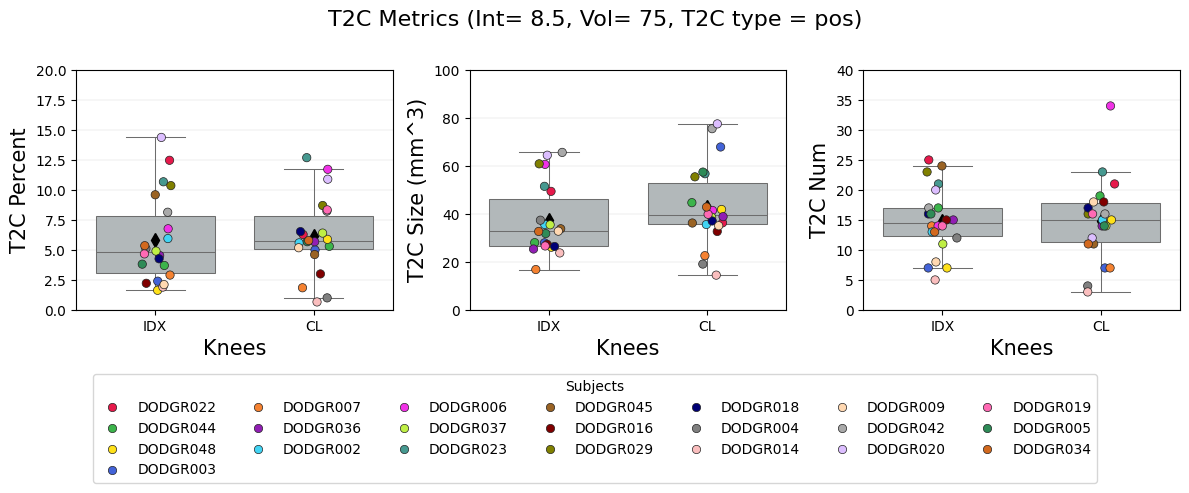

In [79]:
results_path = f'/dataNAS/people/anoopai/DODGR/results'

cluster_type ='pos'
intensity_threshold = 8.5
volume_threshold = 75

file_path = os.path.join(results_path, 'T2C_metrics.xlsx')
plot_save_path =  os.path.join(results_path, f'T2C_metrics_int{intensity_threshold}_vol{volume_threshold}_{cluster_type}.jpg')
    
data = pd.read_excel(file_path, sheet_name=cluster_type, header=0) 
data = data[data['Intensity Threshold (ms)'] == intensity_threshold]
data = data[data['Volume Threshold (voxels)'] == volume_threshold]

data_all = data[data['T2C Label'] == 'All']

parameters = ['T2C Percent', 'T2C Size (mm^3)', 'T2C Num']
data_all.columns

plot_t2c_metrics(data_all, parameters, intensity_threshold, volume_threshold, cluster_type, plot_save_path)
clear_output()

# Sub-regions

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_t2c_metrics_subregions(data, parameters, intensity_threshold, volume_threshold, cluster_type, plot_save_path):
    # Your parameters and colors
    colors = [
        "#E6194B", "#3CB44B", "#FFE119", "#4363D8", "#F58231", "#911EB4", 
        "#42D4F4", "#F032E6", "#BFEF45", "#469990", "#9A6324", "#800000", 
        "#808000", "#000075", "#808080", "#FABEBE", "#FFD8B1", "#A9A9A9", 
        "#DCBEFF", "#FF69B4", "#2E8B57", "#D2691E"
    ]
    
    subregions = data['Sub-region'].unique()

    fig, axes = plt.subplots(len(parameters), len(subregions), figsize=(15, 8))

    for i, subregion in enumerate(subregions):
        for j, parameter in enumerate(parameters):
            ax = axes[j, i] if len(subregions) > 1 else axes[i]
            
            # Filter data by subregion
            data_subregion = data[data['Sub-region'] == subregion]

            # Plotting box plots
            sns.boxplot(
                x='Knee', 
                y=f'{parameter}', 
                data=data_subregion,
                linewidth=0.75,
                width=0.75,
                color='#b1b9bb',
                showfliers=False,
                showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"black", "markeredgecolor":"black", "markersize":"7.5"},
                ax=ax
            )
            
            # Add scatter dots with consistent colors for each subject
            sns.stripplot(
                x='Knee', 
                y=f'{parameter}', 
                data=data_subregion,  
                hue='Subject',  # Color points based on the subject
                palette=colors,  # Use a categorical palette
                alpha=1,   # Adjust transparency
                jitter=True,  # Add jitter to avoid overlapping points
                linewidth=0.5,  # Adjust dot edge width
                legend=True,  # Disable legend (we'll handle it separately)
                size=6,
                ax=ax
            )
        
            # Set y-axis limits based on the parameter
            if parameter == 'T2C Percent':
                ax.set_ylim(0, 50)
            elif parameter == 'T2C Avg Size (mm^3)':
                ax.set_ylim(0, 80)
            elif parameter == 'T2C Num':
                ax.set_ylim(0, 50) 
                
            # Add labels and title
            if j == 0:  # Add title only for the first row
                ax.set_title(f'{subregion}', fontsize=18)
            else:
                ax.set_title('')
                
            if j == len(parameters) - 1 and i==2:  # Add x-tick labels only for the last row
                ax.set_xlabel('Knees', fontsize=15)
            else:
                ax.set_xlabel('')
                
            if j != len(parameters) - 1:  # Add x-tick labels only for the last row
                ax.set_xticklabels([])
                       

            if i == 0:  # Add y-tick labels only for the first column
                ax.set_ylabel(f'{parameter}', fontsize=15)
                # ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
            else:
                ax.set_ylabel('')
                ax.set_yticklabels([])
                
            # Add labels and title
            ax.get_legend().remove()
            ax.grid(color='gray', linestyle='-', linewidth=0.1, axis='y')

    # Adjust layout and add legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=8, fontsize=12, bbox_to_anchor=(0.5, -0.17), title='Subjects')

    # Set a title for the whole figure
    fig.suptitle(f'T2C Metrics (Int= {intensity_threshold}, Vol= {volume_threshold}, T2C type = {cluster_type})', fontsize=16, x=0.5, y=0.98, ha='center')

    # Adjust layout
    plt.tight_layout()
    # plt.subplots_adjust(bottom=0.25, top=0.9)  # Adjust bottom and top to fit the legend and title
    plt.savefig(plot_save_path, dpi=780, bbox_inches='tight')


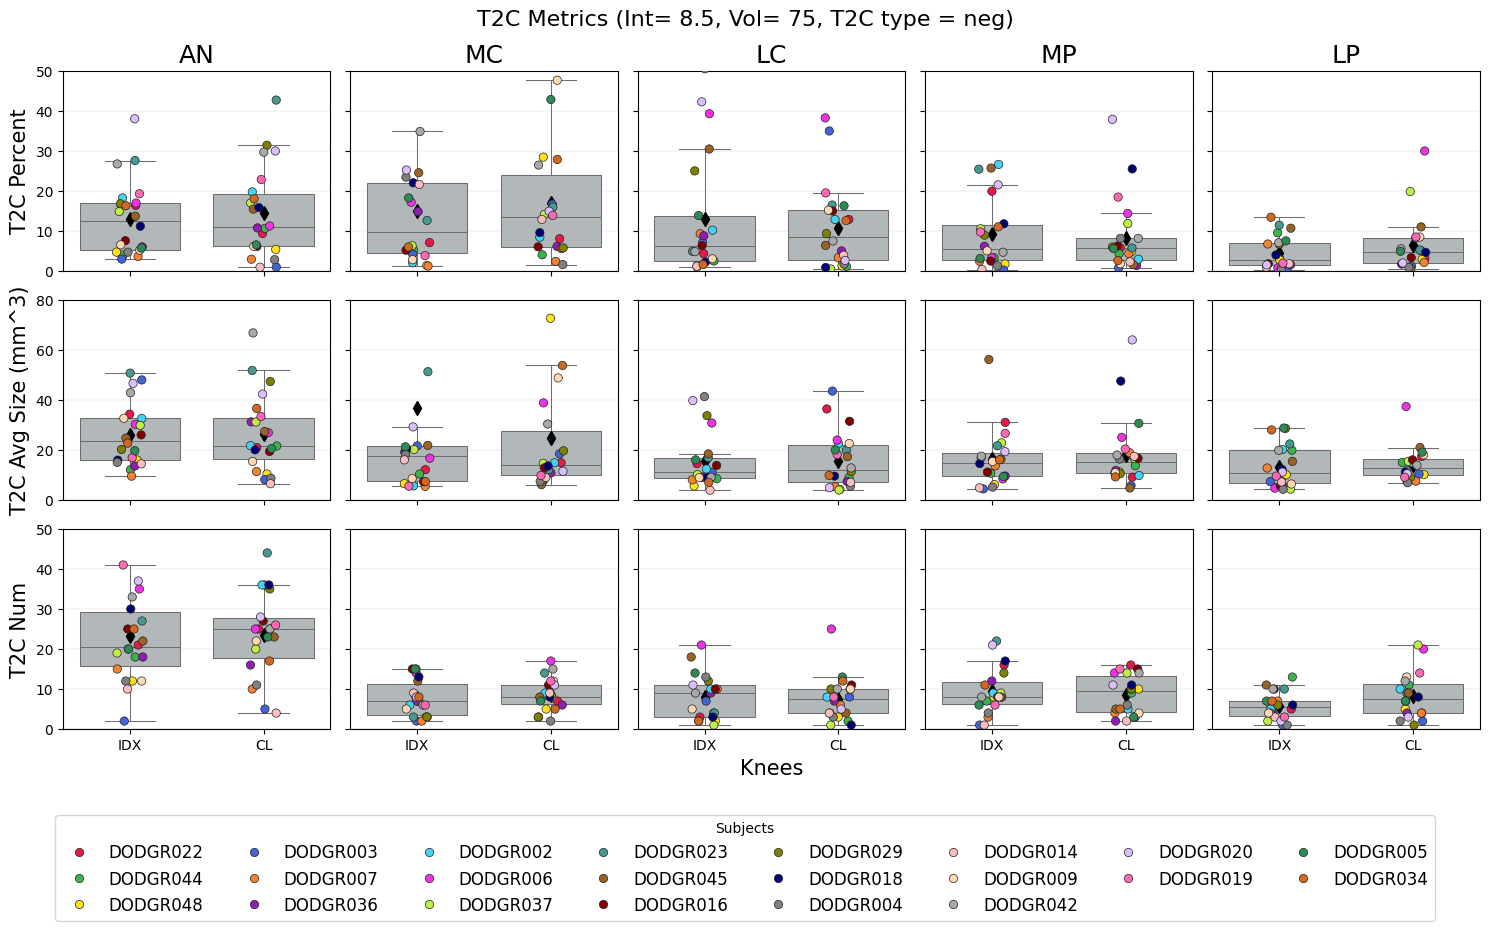

In [104]:
results_path = f'/dataNAS/people/anoopai/DODGR/results'

cluster_type ='neg'
intensity_threshold = 8.5
volume_threshold = 75 

file_path = os.path.join(results_path, 'T2C_metrics_subregions_pos.xlsx')
plot_save_path =  os.path.join(results_path, f'T2C_metrics_subregions_int{intensity_threshold}_vol{volume_threshold}_{cluster_type}.jpg')
    
data = pd.read_excel(file_path, sheet_name='Sub-region Metrics', header=0) 
data = data[data['Intensity Threshold (ms)'] == intensity_threshold]
data = data[data['Volume Threshold (voxels)'] == volume_threshold]

parameters = ['T2C Percent', 'T2C Avg Size (mm^3)', 'T2C Num']
data.columns

plot_t2c_metrics_subregions(data, parameters, intensity_threshold, volume_threshold, cluster_type, plot_save_path)
clear_output()